 <center>  <h2> Comparative Analysis of Precipitation – Seattle vs New York City


### Introduction:</br>
Seattle, Washington, and New York City, New York, represent two distinct climatic regions of the United States. Seattle is located in the Pacific Northwest, near Puget Sound and the Cascade Mountain Range, which influences its temperate marine climate. The city is well known for its frequent light rain , with mild, wet winters and relatively dry summers.

In contrast, New York City is situated on the northeastern Atlantic coast and has a humid subtropical climate. It experiences hot, humid summers and cold winters, with a wider range of temperatures and weather patterns throughout the year. Rainfall in New York City tends to occur as heavier and more intense downpours and thunderstorms.

This analysis aims to determine whether Seattle truly receives more rainfall than New York City in terms of overall precipitation and frequency of days with rainfall. By comparing daily precipitation data from both locations, we will explore the differences in rainfall frequency and total precipitation amounts using the data science methodologies.

### Data Description
Precipitation data is downloaded from NOAA's Climate Data Online Search tool for Seattle and NYC from the dates Jan 1 2018 to Dec 31 2022.</br>

 **Source:** 
 1. National Oceanic and Atmospheric Administration (NOAA) </br>
 2. Global Historical Climatology Network Daily (GHCND) </br>

 **Links:**</br>
  https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND</br>
  https://www.ncei.noaa.gov/data/daily-summaries/doc/GHCND_documentation.pdf</br>

  The GHCND dataset typically includes:
- **Station**
- **Date** of observation  
- **Precipitation (PRCP)** — measured in tenths of millimeters  
- **Temperature (TMAX, TMIN)**  
- **Snowfall (SNOW)** and **Snow Depth (SNWD)**

**Stations Selected:**
- **Seattle, WA:** Seattle–Tacoma International Airport (Station ID: `USW00024233`)  
- **New York City, NY:** John F. Kennedy International Airport (Station ID: `USW00094789`)  

The raw CSV files for each city were downloaded using NOAA’s filtered for the years **2018–2022**.
The data was processed to standardize date formats, remove unnecessary columns, and rename the remaining columns for clarity. The two city datasets were then combined into a single DataFrame, and missing values were handled appropriately. This cleaned and consolidated dataset was used for the comparative rainfall analysis between Seattle and New York City.



### Data Cleaning and Preprocessing

#### Import libraries

In [57]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style('whitegrid')

#### Load the datasets for each of the cities:

#### Seattle data set

In [58]:
df_seattle = pd.read_csv('../data/seattle_rain.csv')


#### NYC data set

In [59]:
df_nyc = pd.read_csv('../data/nyc_rain.csv')


#### We now explore contents of the data sets. We start by looking at the head of each dataframes.This will let us see the names of the columns and few values for each of the columns

In [60]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [61]:
df_nyc.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-01,17.67,NaN,0.00,0.0,0.0,12,18,...,29.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-02,15.66,NaN,0.00,0.0,0.0,18,26,...,23.0,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-03,8.28,NaN,0.00,0.0,0.0,21,28,...,19.9,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-04,28.19,NaN,0.49,8.0,1.2,25,29,...,44.1,55.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-05,25.05,NaN,0.00,0.0,7.9,15,19,...,36.0,46.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#### We now examine shape of the datasets

In [62]:
print('Seattle Dataset\n1. # of rows:', df_seattle.shape[0], '\n2. # of columns:', df_seattle.shape[1])

Seattle Dataset
1. # of rows: 1658 
2. # of columns: 10


In [63]:
print('NYC Dataset\n1. # of rows:', df_nyc.shape[0], '\n2. # of columns:', df_nyc.shape[1])

NYC Dataset
1. # of rows: 1826 
2. # of columns: 23


<b> Observation: </b>

* Seattle data set has 1658 observations with 10 columns whereas NYC dataset has 1826 observations and 23 columns. This might indicate Seattle has missing observations compared to the NYC dataset.

#### We now examine the column names for each of the dataset

In [64]:
# List the column names in the Seattle dataframe

df_seattle.columns 

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [65]:
# List the column names in the NYC dataframe

df_nyc.columns 

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09'],
      dtype='object')

#### We check the data types, size of the data frame, and numbers of missing values using .info()

In [66]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [67]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   AWND     1826 non-null   float64
 4   PGTM     0 non-null      float64
 5   PRCP     1826 non-null   float64
 6   SNOW     1826 non-null   float64
 7   SNWD     1826 non-null   float64
 8   TAVG     1826 non-null   int64  
 9   TMAX     1826 non-null   int64  
 10  TMIN     1826 non-null   int64  
 11  WDF2     1826 non-null   int64  
 12  WDF5     1815 non-null   float64
 13  WSF2     1826 non-null   float64
 14  WSF5     1815 non-null   float64
 15  WT01     726 non-null    float64
 16  WT02     139 non-null    float64
 17  WT03     160 non-null    float64
 18  WT04     31 non-null     float64
 19  WT05     3 non-null      float64
 20  WT06     16 non-null     float64
 21  WT08     77 no

<b> Observation: </b>

* NYC datasets have 1826 rows compared to Seattle  dataset that have 1658 rows

#### Now we examine the `STATION` column

In [68]:
df_seattle['STATION'] 

0       US1WAKG0225
1       US1WAKG0225
2       US1WAKG0225
3       US1WAKG0225
4       US1WAKG0225
           ...     
1653    US1WAKG0225
1654    US1WAKG0225
1655    US1WAKG0225
1656    US1WAKG0225
1657    US1WAKG0225
Name: STATION, Length: 1658, dtype: object

In [69]:
df_nyc['STATION']

0       USW00094789
1       USW00094789
2       USW00094789
3       USW00094789
4       USW00094789
           ...     
1821    USW00094789
1822    USW00094789
1823    USW00094789
1824    USW00094789
1825    USW00094789
Name: STATION, Length: 1826, dtype: object

In [70]:
print('Unique values of STATION column in:')
print('1. Seattle dataset:', df_seattle['STATION'].unique())
print('2. NYC dataset:', df_nyc['STATION'].unique())

Unique values of STATION column in:
1. Seattle dataset: ['US1WAKG0225']
2. NYC dataset: ['USW00094789']


<b> Observation: </b>
* STATION column in both datasets has only one unique value, indicating that the data is from a single weather station in each city.


#### Examine the `DATE` column

In [71]:
df_nyc['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
1821    2022-12-27
1822    2022-12-28
1823    2022-12-29
1824    2022-12-30
1825    2022-12-31
Name: DATE, Length: 1826, dtype: object

In [72]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

<b> Observation: </b>

* Seattle and NYC datasets have a different DATE formats i.e. 'YYYY-MM-DD' in NYC versus 'MM/DD/YY' in Seattle dataset. We should standardize date format across both the datasets.
* Further the data type of these columns is not date datatype.

In [73]:
# Convert the DATE column of Seattle dataset to datetime format

df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE']) 
df_seattle['DATE']

/var/folders/9v/5yh40h_55xv50xhdsn75mt000000gn/T/ipykernel_52129/1036007586.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [74]:
# Convert the DATE column of NYC dataset to datetime format

df_nyc['DATE'] = pd.to_datetime(df_nyc['DATE']) 
df_nyc['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1821   2022-12-27
1822   2022-12-28
1823   2022-12-29
1824   2022-12-30
1825   2022-12-31
Name: DATE, Length: 1826, dtype: datetime64[ns]

### We now check for range of dates

In [75]:
# Find the minimum and maximum dates in the Seattle dataframe

df_seattle['DATE'].agg(['min','max']) 

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [76]:
# Find the minimum and maximum dates in the NYC dataframe

df_nyc['DATE'].agg(['min','max']) 

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [77]:
# Calculate the total number of days between the period from Jan 1, 2018 to Dec 31, 2022

# Define two dates
date1 = date(2018, 1, 1)
date2 = date(2022, 12, 31)

# Calculate difference
days_inclusive = (date2 - date1) + pd.Timedelta(days=1) #Inclusive of both start and end date

# number of days
print('Total number of days between the period from Jan 1, 2018 to Dec 31, 2022:', days_inclusive.days)

Total number of days between the period from Jan 1, 2018 to Dec 31, 2022: 1826


In [78]:
# Count the number of unique dates in the Seattle dataframe

df_seattle['DATE'].nunique() 

1658

In [79]:
#Count the number of unique dates in the NYC dataframe
df_nyc['DATE'].nunique() 

1826

<b> Observation: </b>

* Seattle has data missing for certain days. NYC doesn't have any missing values.

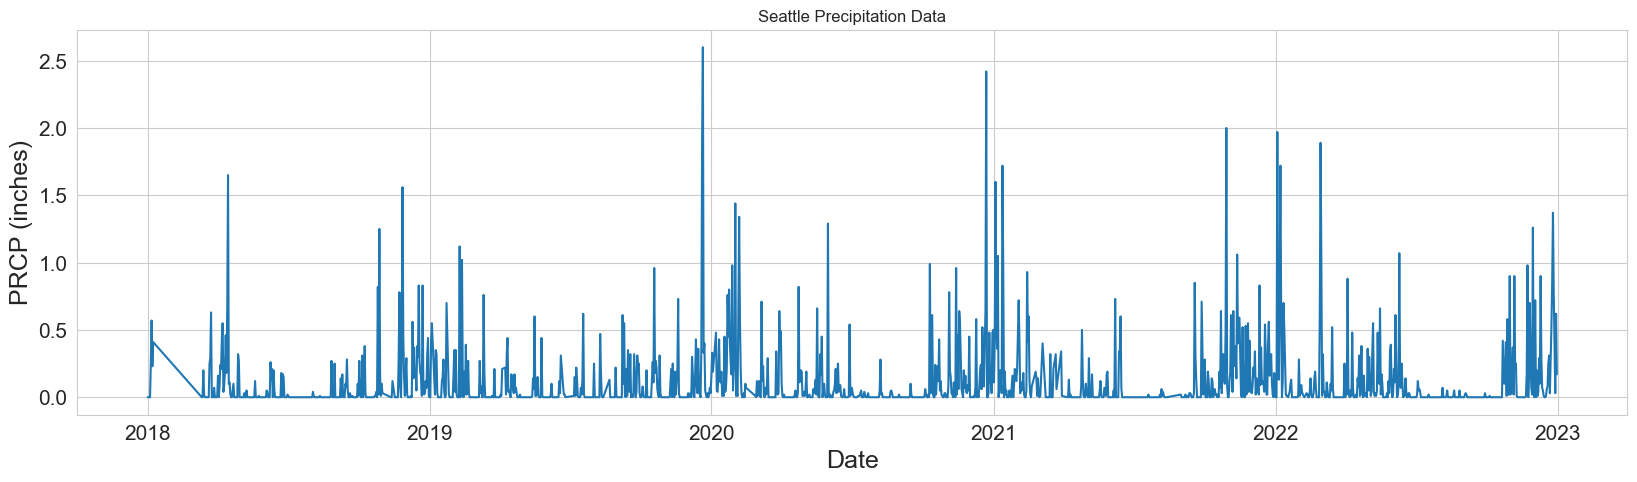

In [80]:
# Plot the daily precipitation data for Seattle.

plt.figure(figsize=(20, 5))
sns.lineplot(data=df_seattle, x='DATE', y='PRCP')
plt.xlabel('Date', fontsize=18)
plt.ylabel('PRCP (inches)', fontsize=18) 
plt.title('Seattle Precipitation Data')
plt.tick_params(labelsize=15)
plt.show()

<b> Observation: </b>

* The above plot shows that Seattle has precipitation data missing for certain days since the line is not continuous.


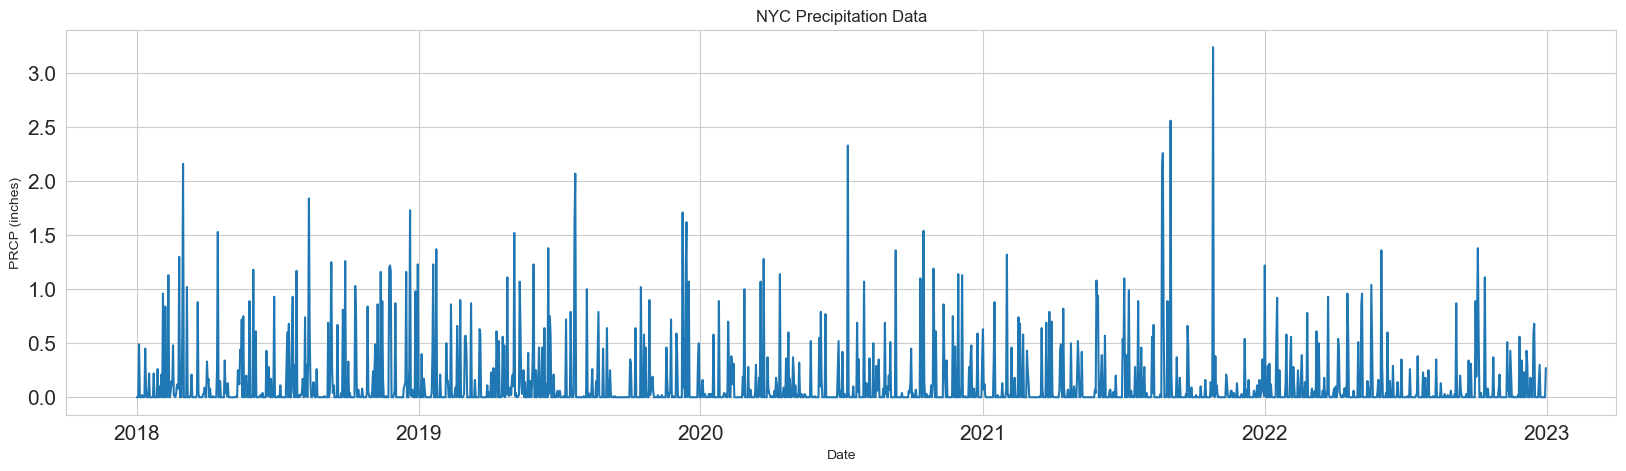

In [81]:
# Plot the daily precipitation data for NYC

plt.figure(figsize=(20, 5))
sns.lineplot(data=df_nyc, x='DATE', y='PRCP')
plt.xlabel('Date')
plt.ylabel('PRCP (inches)') 
plt.title('NYC Precipitation Data')
plt.tick_params(labelsize=15)
plt.show()

In [82]:
df_seattle.head(3) #Display the first 3 rows of the dataframe

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [83]:
df_seattle.tail(3) #Display the last 3 rows of the dataframe

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,NaN,NaN,0.17,NaN,NaN,NaN,NaN


In [84]:
df_nyc.head(3)

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-01,17.67,NaN,0.0,0.0,0.0,12,18,...,29.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-02,15.66,NaN,0.0,0.0,0.0,18,26,...,23.0,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-03,8.28,NaN,0.0,0.0,0.0,21,28,...,19.9,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> Observation: </b>

* We now want to combine the two datasets into one dataframe for further analysis.</br>
* This is done by joining the two dataframes on the 'DATE' column using an outer join.</br>
* This ensures that all the dates from both datasets are included in the final dataframe, even if one of the datasets is missing data for a particular date.</br>


#### Join data frames keeping `DATE` and `PRCP` columns

In [85]:
# Merge the NYC and Seattle dataframes on the DATE column using an outer join to include all dates from both datasets

df = df_nyc[['DATE','PRCP']].merge(df_seattle[['DATE','PRCP']], on='DATE', how='outer')

In [86]:
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.49,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.00,0.62


<b> Observation: </b>

* We now have a combined dataframe with three columns: 'DATE', 'PRCP_x' (NYC precipitation), and 'PRCP_y' (Seattle precipitation).</br>
* The column names have to be renamed for clarity. So we rename the columns using tidy data frame.</br>


#### Create a tidy data frame with columns for city and precipitation

In [87]:
# Tranforming the merged dataframe to tidy data frame. We use the melt function from pandas to achieve this.

df = pd.melt(
    df,id_vars='DATE',
    var_name='city',
    value_name='precipitation'
    )
df

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.49
4,2018-01-05,PRCP_x,0.00
...,...,...,...
3647,2022-12-27,PRCP_y,0.78
3648,2022-12-28,PRCP_y,0.40
3649,2022-12-29,PRCP_y,0.03
3650,2022-12-30,PRCP_y,0.62


#### To get a clear picture we rename the city values as 'NYC' and 'SEA'

In [88]:
df.loc[df['city']=='PRCP_x', 'city'] = 'NYC'# Replace the city values for NYC
df.loc[df['city']=='PRCP_y', 'city'] = 'SEA' # Replace the city values for Seattle

##### Rename the columns to be lowercase using `df.rename()`

In [89]:

df = df.rename(columns={'DATE':'date'})
df

,date,city,precipitation
0,2018-01-01,NYC,0.00
1,2018-01-02,NYC,0.00
2,2018-01-03,NYC,0.00
3,2018-01-04,NYC,0.49
4,2018-01-05,NYC,0.00
...,...,...,...
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62


Once the column names are renamed and pivoted, we can check for any missing values in the precipitation column.
Identify and fill in missing values

Determine the number of non-null values in each column.

In [90]:
df.count()

date             3652
city             3652
precipitation    3462
dtype: int64

Determine the number of null values in each column.

In [91]:
df.isna().sum()

date               0
city               0
precipitation    190
dtype: int64

Determine the number of null precipitation values for Seattle and NYC

In [92]:
# Count the null values in the precipitation column

df['precipitation'].isna().sum() 

190

In [93]:
# Count the null values in the precipitation column for NYC

df.loc[df['city']=='NYC', 'precipitation'].isna().sum() 

0

In [94]:
# Count the null values in the precipitation column for Seattle

df.loc[df['city']=='SEA', 'precipitation'].isna().sum() 

190

<b> Observation: </b>

* The above result shows that Seattle has 190 missing precipitation values.

#### Now we move on to impute the missing values 

We will replace missing values with the mean across years of values on that day.


 Algorithm for replacing missing values with the mean across years of values on that day.
- Create a new column for the day of the year
- Calculate the mean precipitation for each day of the year for Seattle using groupby function
- Check for null values in the precipitation column
- Get the indices of the rows with null values in the precipitation column
- Replace the null values in precipitation to the mean values
- Check for null values in the dataframe


In [95]:
# Create a new column for the day of the year

df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear 
df

,date,city,precipitation,day_of_year
0,2018-01-01,NYC,0.00,1
1,2018-01-02,NYC,0.00,2
2,2018-01-03,NYC,0.00,3
3,2018-01-04,NYC,0.49,4
4,2018-01-05,NYC,0.00,5
...,...,...,...,...
3647,2022-12-27,SEA,0.78,361
3648,2022-12-28,SEA,0.40,362
3649,2022-12-29,SEA,0.03,363
3650,2022-12-30,SEA,0.62,364


In [96]:
 # Calculate the mean precipitation for each day of the year for Seattle

mean_precipitation = df.loc[
    df['city']=='SEA',
    ['precipitation', 'day_of_year']
].groupby('day_of_year').mean()

mean_precipitation


,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


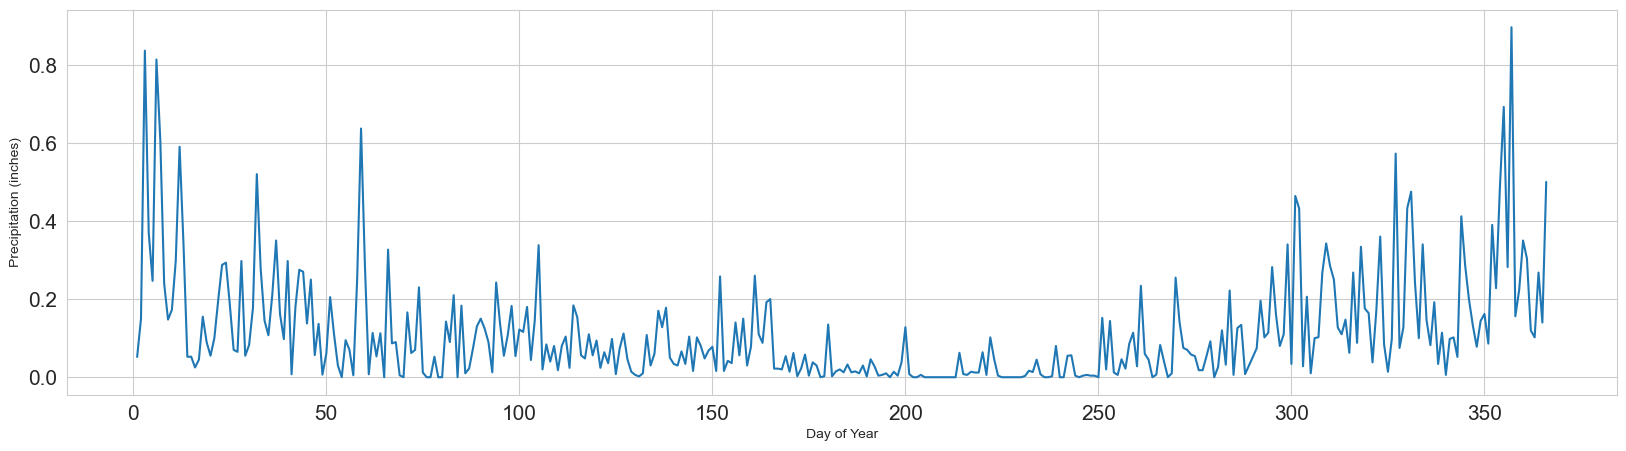

In [97]:
# Plot the mean precipitation for each day of the year for Seattle

plt.figure(figsize=(20, 5))
sns.lineplot(data=mean_precipitation, x='day_of_year', y='precipitation')
plt.xlabel('Day of Year')
plt.ylabel('Precipitation (inches)') 
plt.tick_params(labelsize=15)
plt.show()

In [98]:
# Check for null values in the precipitation column
df['precipitation'].isna() == True 

0       False
1       False
2       False
3       False
4       False
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: precipitation, Length: 3652, dtype: bool

In [ ]:
# Get the indices of the rows with null values in the precipitation column

indices = np.where(df['precipitation'].isna()==True)[0] 

In [ ]:
# Replace the null values in precipitation to the mean values

for index in indices:   
        df.loc[index, 'precipitation'] = mean_precipitation.loc[df.loc[index, 'day_of_year']].values[0] 

In [ ]:
# Check for null values in the dataframe

df.isna().sum() 

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

#### Export the clean .csv file

In [ ]:
# Save the cleaned dataframe to a CSV file

df.to_csv('../data/clean_seattle_nyc_weather.csv', encoding='utf-8-sig', index=False)

The data frame is cleaned and we export the cleaned datafile with name: clean_seattle_nyc_weather.csv to the data folder for futher analysis.